<a href="https://colab.research.google.com/github/adamkleingit/colab/blob/main/Image_Processing_in_Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

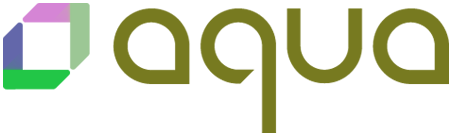

In [41]:
# Create a list to store the urls of the images
urls = ["https://demo.covverme.com/aqua.png"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image_rgba = io.imread(url)
  image_rgb = cv.cvtColor(image_rgba, cv.COLOR_RGBA2RGB)
  image_lab = cv.cvtColor(image_rgba, cv.COLOR_RGB2Lab)
  r,g,b,alpha = cv.split(image_rgba)
  l,a,b = cv.split(image_lab)

  image_2 = cv.merge((l, a, b, alpha))
  cv2_imshow(image_2)
  print('\n')

In [35]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
133
453
4


### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

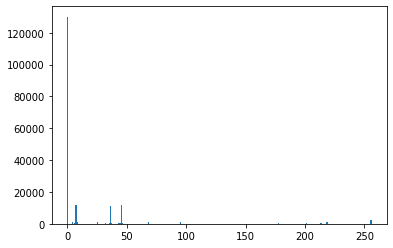

In [42]:
plt.hist(image_rgb.ravel(),bins = 256, range = [0,256]) 
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

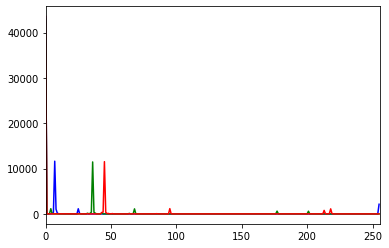

In [43]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

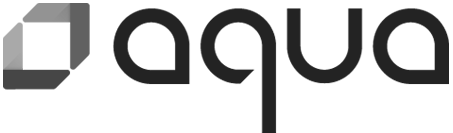

In [48]:
gray_image = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)
gray_image_a = cv.merge((gray_image, gray_image, gray_image, alpha))

cv2_imshow(gray_image_a)

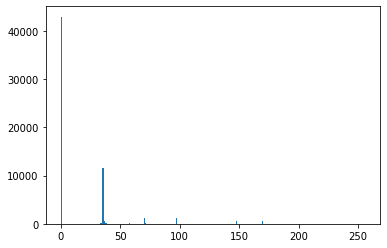

In [49]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


In [ ]:
#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

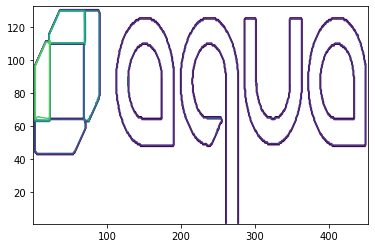

In [50]:
plt.contour(gray_image, origin = "image")

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

In [52]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

error: ignored

#### TODO # 3: Find the contour of your own image

In [ ]:
# Your code
# plt.contour()